# Building a Handwritten Digits Classifier

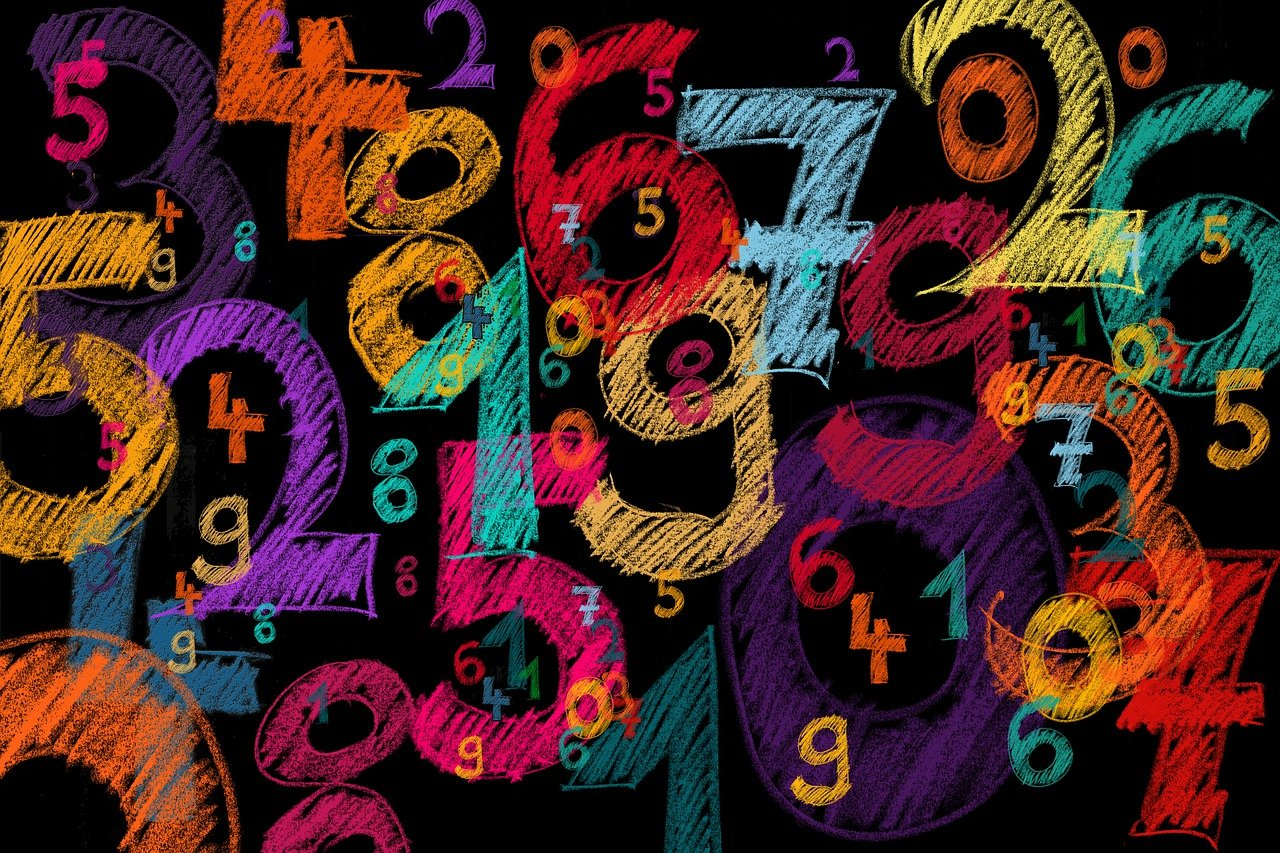

In this project, we'll build several deep feedforward neural networks to classify handwritten digits 
for a dataset from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Deep learning is very effective in image classification because of the models' ability to capture nonlinearity in the data and learn hierarchical representations.
### Summary of Results
The highest accuracy score 0.9878 was achieved for the neural network model with 5 hidden layers, 512 neurons in each, and using 6 folds for cross-validation. However, the difference between this model and the one for the KNN algorithm (with the accuracy score 0.9844) is rather insignificant: around 0.34%. Also, the computational time difference should be taken into account
when selecting the most appropriate algorithm for each particular case.
## Data Downloading and Initial Exploration

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
print(type(digits['data']))
print(type(digits['target']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Let's transform the numpy arrays into a dataframe and Series:

In [3]:
features = pd.DataFrame(digits['data'])
labels = pd.Series(digits['target'])

print(f'\033[1mNumber of entries:\033[0m  {features.shape[0]:,}\n'
      f'\033[1mNumber of features:\033[0m {features.shape[1]}\n')

pd.set_option('max_columns', None)
print(labels.head(20))
features.head(3)

Number of entries:  1,797
Number of features: 64

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
dtype: int32


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


Each entry in the dataset corresponds to an image of a handwritten digit and is represented as 64-pixel values. To visualize the image, we need to reshape these pixel values back into the 8 by 8 and plot them on a coordinate grid:

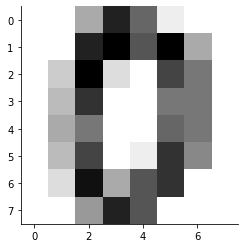

In [4]:
plt.imshow(features.iloc[0].values.reshape(8, 8), cmap='gray_r')
sns.despine()

Let's now visualize the first 10 handwritten digits:

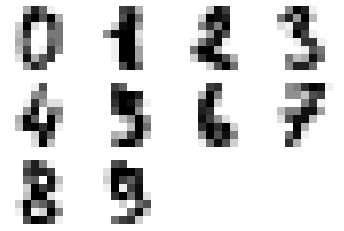

In [5]:
sns.set_style('white')
fig, ax = plt.subplots(3, 4)

columns = [0, 1, 2, 3] * 3
rows = [0]*4 + [1]*4 + [2]*4

for i in range(12):
    if i < 10:
        ax[rows[i], columns[i]].imshow(features.iloc[i].values.reshape(8, 8), cmap='gray_r')
    ax[rows[i], columns[i]].set_xticklabels([])
    ax[rows[i], columns[i]].set_yticklabels([])
    sns.despine(left=True, bottom=True)

If we compare, for example, different zeros from the dataset, we'll see that they look quite different:

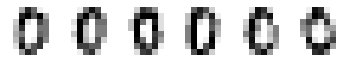

In [6]:
fig, ax = plt.subplots(1, 6)
zeros = [0, 10, 20, 30, 48, 49]
columns = list(range(6))

for i in range(6):
    ax[columns[i]].imshow(features.iloc[zeros[i]].values.reshape(8, 8), cmap='gray_r')
    ax[columns[i]].set_xticklabels([])
    ax[columns[i]].set_yticklabels([])
    sns.despine(left=True, bottom=True)

Let's now take a look at the distribution of each class (i.e., each digit) in the dataset:

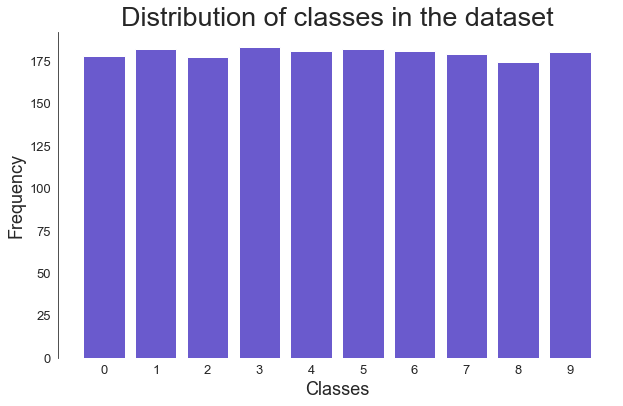

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(list(range(10)), labels.value_counts().sort_index(), color='slateblue')
plt.title('Distribution of classes in the dataset', fontsize=27)
plt.xlabel('Classes', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(list(range(10)), fontsize=13)
plt.yticks(fontsize=13)
sns.despine(bottom=True)
plt.show()

We see that the dataset is perfectly balanced, hence we can use the accuracy score as a metric to estimate the performance of our future models.
## Machine Learning Approaches
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the other algorithms, such as k-nearest neighbors, decision tree, and random forest, make no such assumption. This allows them to capture nonlinearity in the data.
### K-Nearest Neighbors (KNN) Algorithm
Let's start with the KNN algorithm but first, we'll create a pipeline of functions for training and testing different models:

In [8]:
def train_knn(k, X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

def train_decision_tree(X_train, y_train, max_depth=None):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    clf.fit(X_train, y_train)
    return clf

def train_random_forest(X_train, y_train):
    clf = RandomForestClassifier(random_state=1)
    clf.fit(X_train, y_train)
    return clf

def train_nn(X_train, y_train, num_neurons):
    mlp = MLPClassifier(hidden_layer_sizes=num_neurons, random_state=1)
    mlp.fit(X_train, y_train)
    return mlp

def test(model, X_train, X_test, y_train, y_test):
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    accuracy_score_test = accuracy_score(y_test, predictions_test)
    accuracy_score_train = accuracy_score(y_train, predictions_train)
    return accuracy_score_test, accuracy_score_train

def cross_validate(model_type='KNeighborsClassifier', num_neurons=(1, 1), num_splits=4, k=5, max_depth=None):
    accuracy_scores_test = []
    accuracy_scores_train = []
    kf = KFold(n_splits=num_splits, random_state=0, shuffle=True)
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.loc[train_index], features.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        if model_type == 'KNeighborsClassifier':
            model = train_knn(k, X_train, y_train)
        elif model_type == 'DecisionTreeClassifier':
            model = train_decision_tree(X_train, y_train, max_depth=max_depth)
        elif model_type == 'RandomForestClassifier':
            model = train_random_forest(X_train, y_train)
        elif model_type == 'MLPClassifier':
            model = train_nn(X_train, y_train, num_neurons)
        accuracy_score_test, accuracy_score_train = test(model, X_train, X_test, y_train, y_test)
        accuracy_scores_test.append(accuracy_score_test)
        accuracy_scores_train.append(accuracy_score_train)
    return accuracy_scores_test, accuracy_scores_train

def print_accuracy_scores(model_type='KNeighborsClassifier', num_neurons=(1, 1), num_splits=4, k=5, max_depth=None):
    accuracy_scores_test, accuracy_scores_train = cross_validate(model_type=model_type, 
                                                                 num_neurons=num_neurons,
                                                                 num_splits=num_splits, 
                                                                 k=k,
                                                                 max_depth=max_depth)
    return print(f'\033[1mAccuracy scores, test set:\033[0m\n{accuracy_scores_test}\n'
                 f'{np.mean(accuracy_scores_test):.4f}\n\n'
                 f'\033[1mAccuracy scores, train set:\033[0m\n{accuracy_scores_train}\n'
                 f'{np.mean(accuracy_scores_train):.4f}')

# Applying the KNN algorithm
print_accuracy_scores()

Accuracy scores, test set:
[0.98, 0.9799554565701559, 0.9866369710467706, 0.9821826280623608]
0.9822

Accuracy scores, train set:
[0.9910913140311804, 0.9903560830860534, 0.9888724035608308, 0.9925816023738873]
0.9907


The results of applying the KNN algorithm look very accurate both on the train and test sets meaning also that the model isn't overfitted. Let's try to tune the number of neighbors and see if the model becomes even more precise:

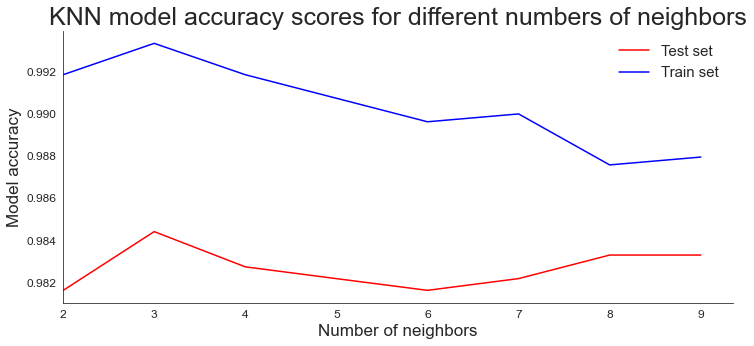

In [9]:
mean_accuracy_score_test = []
mean_accuracy_score_train = []
for k in range(2, 10):
    accuracy_scores_test, accuracy_scores_train = cross_validate(k=k)
    mean_accuracy_score_test.append(np.mean(accuracy_scores_test))
    mean_accuracy_score_train.append(np.mean(accuracy_scores_train))

# Plotting the accuracy values for the test and train sets
def create_line_plot(x, y1, y2, title, xlabel, loc='upper right', xlim_min=2):
    plt.figure(figsize=(12, 5))
    plt.plot(x, y1, color='red')
    plt.plot(x, y2, color='blue')
    plt.title(title, fontsize=25)
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel('Model accuracy', fontsize=17)
    plt.xticks(x, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(xlim_min, None)
    plt.legend(['Test set','Train set'], frameon=False, loc=loc, fontsize=15)
    sns.despine()
    plt.show()

create_line_plot(x=range(2, 10), y1=mean_accuracy_score_test, y2=mean_accuracy_score_train,
                 title='KNN model accuracy scores for different numbers of neighbors',
                 xlabel='Number of neighbors')

The most accurate model was obtained for the number of neighbors equal to 3:

In [10]:
print_accuracy_scores(k=3)

Accuracy scores, test set:
[0.9866666666666667, 0.9844097995545658, 0.9866369710467706, 0.9799554565701559]
0.9844

Accuracy scores, train set:
[0.991833704528582, 0.9933234421364985, 0.9933234421364985, 0.994807121661721]
0.9933


The accuracy scores are insignificantly higher compared to the ones for a default value of k.

All in all, the KNN algorithm gave highly precise results.

### Decision Tree Algorithm

In [11]:
print_accuracy_scores(model_type='DecisionTreeClassifier')

Accuracy scores, test set:
[0.8511111111111112, 0.8663697104677061, 0.8619153674832962, 0.8151447661469933]
0.8486

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0]
1.0000


In comparison to the KNN model, the decision tree model is rather overfitted and the accuracy score on the test data is much lower. Let's see if tuning the maximum tree depth can enhance the accuracy score on the test set:

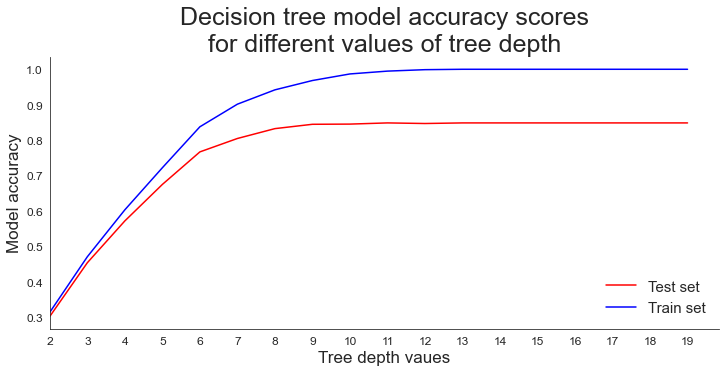

In [12]:
mean_accuracy_score_test = []
mean_accuracy_score_train = []
for n in range(2, 20):
    accuracy_scores_test, accuracy_scores_train = cross_validate(model_type='DecisionTreeClassifier', max_depth=n)
    mean_accuracy_score_test.append(np.mean(accuracy_scores_test))
    mean_accuracy_score_train.append(np.mean(accuracy_scores_train))

create_line_plot(x=range(2, 20), y1=mean_accuracy_score_test, y2=mean_accuracy_score_train,
                 title='Decision tree model accuracy scores\nfor different values of tree depth', 
                 xlabel='Tree depth vaues', loc='lower right')

We can observe that tuning the maximum tree depth doesn't help much, the mean accuracy score on the test data never exceeds 0.9.
### Random Forest Algorithm

In [13]:
print_accuracy_scores(model_type='RandomForestClassifier')

Accuracy scores, test set:
[0.9777777777777777, 0.9688195991091314, 0.9710467706013363, 0.9799554565701559]
0.9744

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0]
1.0000


The accuracy score on the test data is rather high even with the default values of all the parameters, the model is relatively non-overfitted. Tuning the parameters could potentially lead to further enhancement of the model accuracy. However, since the random forest models are usually quite stable, probably we wouldn't have achieved any significant improvement. 
## Deep Learning Approaches
Now, we're going to build some neural networks and estimate their performance.
### Neural Network with One Hidden Layer
First, let's create neural networks with a single layer and the following number of neurons: 8, 16, 32, 64, 128, and 256, and visualize the resulting values of accuracy for both test and train sets:

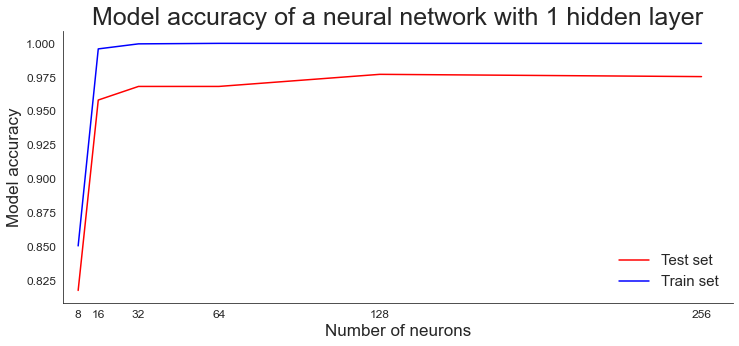

In [14]:
num_neurons = [8, 16, 32, 64, 128, 256]
mean_accuracy_score_test = []
mean_accuracy_score_train = []
for n in num_neurons:
    accuracy_scores_test, accuracy_scores_train = cross_validate(model_type='MLPClassifier', num_neurons=(n, ))
    mean_accuracy_score_test.append(np.mean(accuracy_scores_test))
    mean_accuracy_score_train.append(np.mean(accuracy_scores_train))

create_line_plot(x=num_neurons, y1=mean_accuracy_score_test, y2=mean_accuracy_score_train,
                 title='Model accuracy of a neural network with 1 hidden layer', 
                 xlabel='Number of neurons', loc='lower right')

We can observe a sharp increase of the model precision on the transition from 8 to 16 neurons both on the test and train sets. Then, starting from 16 neurons for the train set and 128 neurons for the test set, the accuracy score reaches the plateau, which for the train set seems to be equal to 1.

Let's reconstruct the most precise neural network for the test set so far, i.e., the one with 256 neurons in the single layer, and calculate its accuracy:

In [15]:
print_accuracy_scores(model_type='MLPClassifier', num_neurons=(256, ))

Accuracy scores, test set:
[0.9733333333333334, 0.9710467706013363, 0.977728285077951, 0.9799554565701559]
0.9755

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0]
1.0000


The results don't impress: we achieved a higher accuracy for the KNN algorithm (0.9844) and a comparable accuracy for the random forest (0.9744), not to mention the computational time difference. Hence, using a single hidden layer neural network for this problem doesn't seem to help much.

### Neural Network with Two Hidden Layers
Let's try using two hidden layers with the same values of the number of neurons (8, 16, 32, 64, 128, and 256), this time in **both** hidden layers:

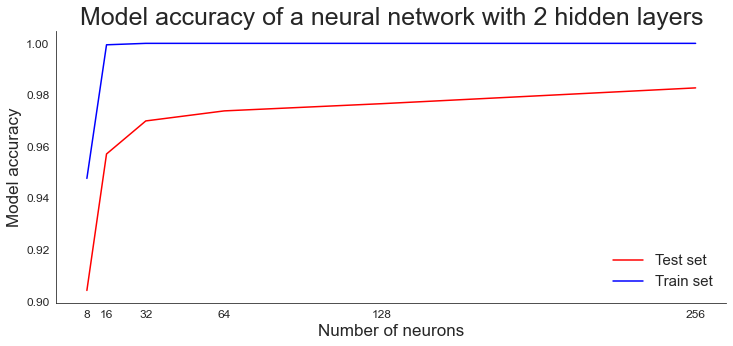

In [16]:
mean_accuracy_score_test = []
mean_accuracy_score_train = []
for n in num_neurons:
    accuracy_scores_test, accuracy_scores_train = cross_validate(model_type='MLPClassifier', num_neurons=(n, n))
    mean_accuracy_score_test.append(np.mean(accuracy_scores_test))
    mean_accuracy_score_train.append(np.mean(accuracy_scores_train))

create_line_plot(x=num_neurons, y1=mean_accuracy_score_test, y2=mean_accuracy_score_train,
                 title='Model accuracy of a neural network with 2 hidden layers', 
                 xlabel='Number of neurons', loc='lower right', xlim_min=None)

We see the same tendency to a sharp increase of the model accuracy. For the test set, the plot hasn't even reached the plateau. 

Let's double the number of neurons in both hidden layers (512) and calculate the model accuracy for this case:

In [17]:
print_accuracy_scores(model_type='MLPClassifier', num_neurons=(512, 512))

Accuracy scores, test set:
[0.9844444444444445, 0.9844097995545658, 0.9910913140311804, 0.9888641425389755]
0.9872

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0]
1.0000


Hence, for a neural network with 2 hidden layers with 512 neurons in each, we obtained the most accurate model so far (0.9872).
### Neural Network with Three Hidden Layers
Now, let's add one more hidden layer and check if it leads to a further enhancement of the model accuracy. In each of the 3 hidden layers, we'll iteratively try the same values of the number of neurons as earlier: 8, 16, 32, 64, 128, and 256.

Since using more hidden layers is known to increase the amount of overfitting, we'll try to prevent it and increase the number of folds for k-fold cross-validation to 6:

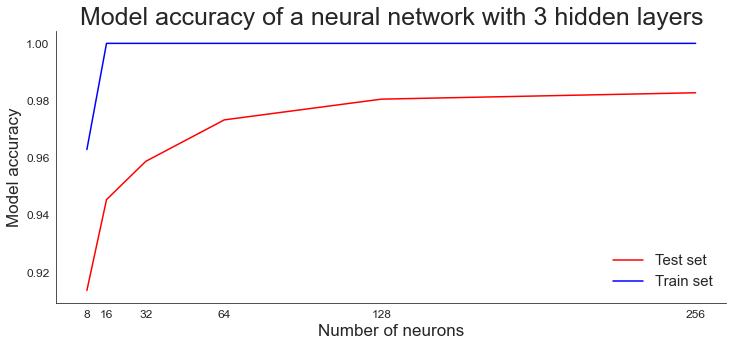

In [18]:
mean_accuracy_score_test = []
mean_accuracy_score_train = []
for n in num_neurons:
    accuracy_scores_test, accuracy_scores_train = cross_validate(model_type='MLPClassifier', 
                                                                 num_splits=6,
                                                                 num_neurons=(n, n, n))
    mean_accuracy_score_test.append(np.mean(accuracy_scores_test))
    mean_accuracy_score_train.append(np.mean(accuracy_scores_train))

create_line_plot(x=num_neurons, y1=mean_accuracy_score_test, y2=mean_accuracy_score_train,
                 title='Model accuracy of a neural network with 3 hidden layers', 
                 xlabel='Number of neurons', loc='lower right', xlim_min=None)

Also in this case, the plot for the test set hasn't reached the plateau yet, with given values of the number of neurons per layer. 

Let's again double the number of neurons in all the 3 hidden layers (512) and calculate the model accuracy:

In [19]:
print_accuracy_scores(model_type='MLPClassifier', num_splits=6, num_neurons=(512, 512, 512))

Accuracy scores, test set:
[0.9866666666666667, 0.98, 0.9866666666666667, 0.9899665551839465, 0.9899665551839465, 0.9899665551839465]
0.9872

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0000


We achieved the same accuracy as earlier for a neural network with 2 hidden layers with 512 neurons: 0.9872.

After running some other configurations of neural networks (various number of hidden layers, number of neurons per layer, number of folds), we managed to obtain the most accurate model with 5 hidden layers, 512 neurons in each, and using 6 folds for cross-validation:

In [20]:
print_accuracy_scores(model_type='MLPClassifier', num_splits=6, num_neurons=(512, 512, 512, 512, 512))

Accuracy scores, test set:
[0.98, 0.9833333333333333, 0.99, 0.9899665551839465, 0.9899665551839465, 0.9933110367892977]
0.9878

Accuracy scores, train set:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0000


## Conclusion
In this project, we created a pipeline of functions to build several machine learning models including deep feedforward neural networks to classify handwritten digits. The best accuracy scores obtained for each type of model are summarized in the table below:

Algorithm      | Accuracy score on the test set 
---------------| -------------------------- 
Neural Networks| 0.9878
KNN            | 0.9844
Random Forest  | 0.9744 
Decision Tree  | 0.8486 
 
- The highest accuracy was achieved for the neural network model with 5 hidden layers, 512 neurons in each, and using 6 folds for cross-validation. However, the difference between this model and the one for the KNN algorithm is rather insignificant: around 0.34%.


- Building neural network models, especially with increasing the number of layers and neurons per layer, took much more time. This issue can become crucial for models with more layers and/or neurons per layer. A reasonable balance between the desired model accuracy and computational time (in practical terms – deadlines) should be always taken into account when selecting the most appropriate algorithm for each particular case.


- **Potential ways forward:** tuning some other parameters of neural networks, such as the activation function, solver, random state, etc., and measuring the resulting accuracy.